In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

%matplotlib inline


2.6.0


Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each training and test example is assigned to one of the following labels: 0 T-shirt/top, 1 Trouser,2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 5s 1us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [7]:
len(test_images)

10000

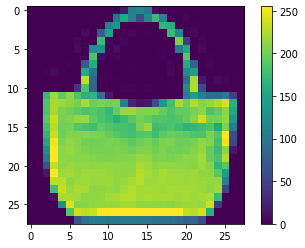

In [9]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

standardize to a 0, 1 scale by dividing by 255. logic -https://stackoverflow.com/questions/20486700/why-do-we-always-divide-rgb-values-by-255

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

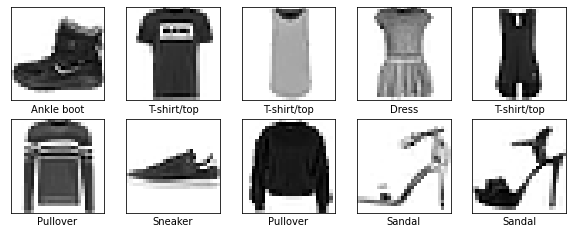

In [12]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2021-08-22 15:41:15.351636: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

2021-08-22 15:43:06.364669: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4996 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3742 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3369 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3114 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2948 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2792 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2685 - accuracy: 0.8984
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2569 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2466 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.238

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3536 - accuracy: 0.8762

Test accuracy: 0.8762000203132629



overfitting causes the accuracy on test data to be a bit less than that on the train data. the model performs worse on new (train data) than it should beacuse it has internalized some noise

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [21]:
predictions[0]

array([8.3636621e-08, 6.2072976e-13, 9.9457571e-09, 2.0061110e-12,
       2.6243330e-09, 3.9586841e-04, 6.7397487e-08, 9.7346380e-03,
       7.7124279e-10, 9.8986930e-01], dtype=float32)

array of numbers representing the confidence that the image belongs to that category. In this case the probability is highest that the image belongs to group 9

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [40]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

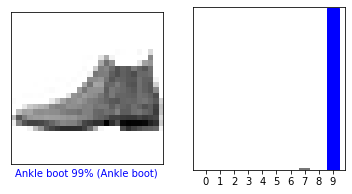

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

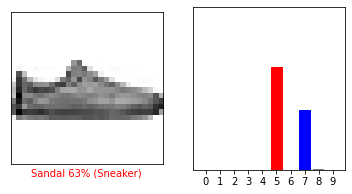

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

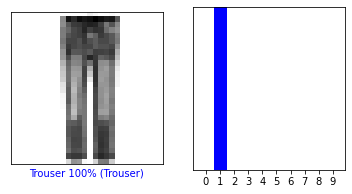

In [43]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

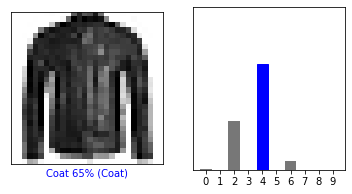

In [44]:
i = 50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

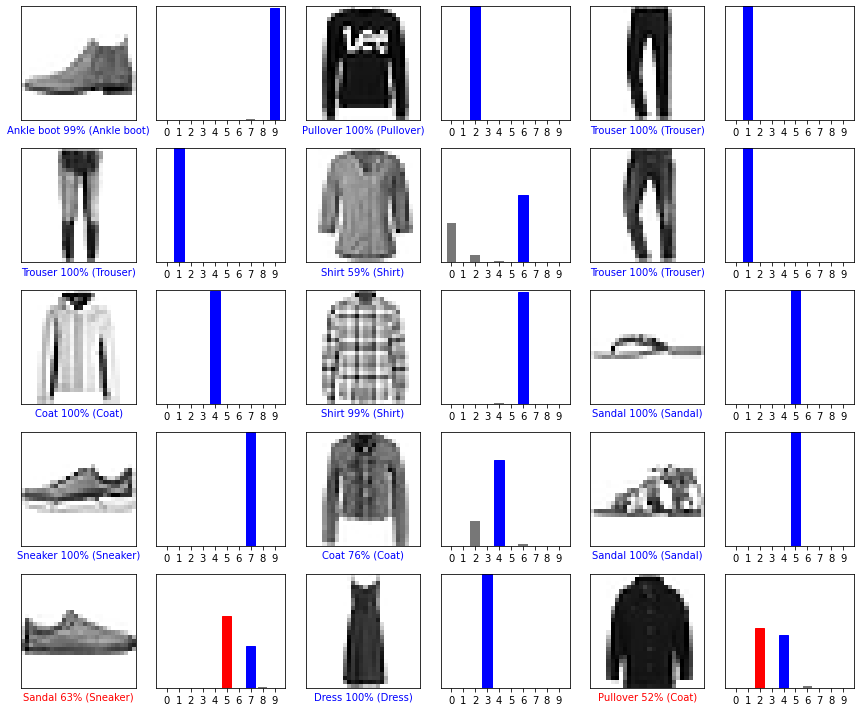

In [45]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [46]:
# Grab an image from the test dataset, and use model to predict where it is
img = test_images[1]

print(img.shape)

(28, 28)


In [47]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [48]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.1699602e-06 9.3008587e-13 9.9980289e-01 1.3135747e-11 1.6013962e-04
  1.3345031e-10 3.4798988e-05 6.7221183e-17 3.7859718e-10 1.9645369e-14]]


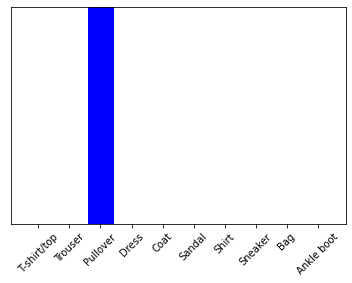

In [49]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [50]:
np.argmax(predictions_single[0])

2